# Conhecimentos Técnicos - Cientista de Dados Oncase

### Este projeto de EDA é um teste de conhecimento para vaga de cientista de dados da empresa Oncase.
Author: Dorivan Kadatz Borba<br>
Coding: utf-8<br>
Language: PT-BR

# Importando pacotes e montando o drive.

In [ ]:
!pip install seaborn==0.12.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import seaborn.objects as so # Necessário seaborn 0.12.1 ou maior
from matplotlib import style

from wordcloud import WordCloud
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Importando os datasets.

In [ ]:
receitas = pd.read_json('/content/drive/MyDrive/Oncase/eda_receitas.json')

# Análise exploratória dos dados.

In [ ]:
# Mostra as primeiras 5 observações do dataset
receitas.head()

,directions,fat,date,categories,calories,desc,protein,rating,title,ingredients,sodium
0,"[1. Place the stock, lentils, celery, carrot, ...",7.0,2006-09-01 04:00:00+00:00,"[Sandwich, Bean, Fruit, Tomato, turkey, Vegeta...",426.0,None,30.0,2.500,"Lentil, Apple, and Turkey Wrap","[4 cups low-sodium vegetable or chicken stock,...",559.0
1,[Combine first 9 ingredients in heavy medium s...,23.0,2004-08-20 04:00:00+00:00,"[Food Processor, Onion, Pork, Bake, Bastille D...",403.0,This uses the same ingredients found in boudin...,18.0,4.375,Boudin Blanc Terrine with Red Onion Confit,"[1 1/2 cups whipping cream, 2 medium onions, c...",1439.0
2,[In a large heavy saucepan cook diced fennel a...,7.0,2004-08-20 04:00:00+00:00,"[Soup/Stew, Dairy, Potato, Vegetable, Fennel, ...",165.0,None,6.0,3.750,Potato and Fennel Soup Hodge,"[1 fennel bulb (sometimes called anise), stalk...",165.0
3,[Heat oil in heavy large skillet over medium-h...,NaN,2009-03-27 04:00:00+00:00,"[Fish, Olive, Tomato, Sauté, Low Fat, Low Cal,...",NaN,The Sicilian-style tomato sauce has tons of Me...,NaN,5.000,Mahi-Mahi in Tomato Olive Sauce,"[2 tablespoons extra-virgin olive oil, 1 cup c...",NaN
4,[Preheat oven to 350°F. Lightly grease 8x8x2-i...,32.0,2004-08-20 04:00:00+00:00,"[Cheese, Dairy, Pasta, Vegetable, Side, Bake, ...",547.0,None,20.0,3.125,Spinach Noodle Casserole,"[1 12-ounce package frozen spinach soufflé, th...",452.0


 ## Receitas: representação das variáveis.

- directions => O modo de preparo da reeita;
- fat => O índice de gordura da receita;
- date => provavelmente o dia da postagem do objeto no site;
- categories => Quais categorias a receita se adéqua, se é sobremesa, se contém ovos, qual estação do ano ela combina, se é gelada frita ou cozida, etc;
- calories => O índice de calorias receita;
- desc => Descrição da receita, uma breve descrição da receita para chamar atenção do mastercheff, algo como: rápido de preparar, fácil, dieta, não pode faltar no almoço em família;
- protein => Índice de proteína receita;
- rating => Nota recebida de 1 a 5;
- title => Nome da receita;
- ingredients => Os ingredientes necessários para o preparo;
- sodium => Índice de sódio da receita.


In [ ]:
# Retorna uma série de informações, como quantidade de observações, tipo dos dados, quantidade de dados não nulos, nome das colunas, etc.
receitas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20130 entries, 0 to 20129
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype              
---  ------       --------------  -----              
 0   directions   20111 non-null  object             
 1   fat          15908 non-null  float64            
 2   date         20111 non-null  datetime64[ns, UTC]
 3   categories   20111 non-null  object             
 4   calories     15976 non-null  float64            
 5   desc         13495 non-null  object             
 6   protein      15929 non-null  float64            
 7   rating       20100 non-null  float64            
 8   title        20111 non-null  object             
 9   ingredients  20111 non-null  object             
 10  sodium       15974 non-null  float64            
dtypes: datetime64[ns, UTC](1), float64(5), object(5)
memory usage: 1.7+ MB


In [ ]:
# Contagem de dados nulos.
receitas.isna().sum()

directions       19
fat            4222
date             19
categories       19
calories       4154
desc           6635
protein        4201
rating           30
title            19
ingredients      19
sodium         4156
dtype: int64

Temos nesse data set 20130 observações, mas se pararmos para observar a quantidade de títulos temos 20111, são 19 receitas sem título, ingrediente, data de publicação, e outros tantos mais sem dados descritivos.

Partindo do pressuposto simples de que, para se ter a públicação de uma receita é preciso ao menos ter uma receita, se não tem a receita como terá os índices calóricos, proteicos, avaliação, etc.

Cabe então identificar esses dados e remove-los do dataset já que não fazem sentido nenhum.

In [ ]:
# Retorna o dataset com os valores True para nulo ou False para não nulo e armazena na variável.
nulo = pd.DataFrame(receitas.isna())
# Retorna apenas os valores True ou nulos.
nulo = nulo[nulo['title'] == True]
nulo

,directions,fat,date,categories,calories,desc,protein,rating,title,ingredients,sodium
1076,True,True,True,True,True,True,True,True,True,True,True
1135,True,True,True,True,True,True,True,True,True,True,True
1907,True,True,True,True,True,True,True,True,True,True,True
5146,True,True,True,True,True,True,True,True,True,True,True
5424,True,True,True,True,True,True,True,True,True,True,True
5558,True,True,True,True,True,True,True,True,True,True,True
7607,True,True,True,True,True,True,True,True,True,True,True
7768,True,True,True,True,True,True,True,True,True,True,True
7881,True,True,True,True,True,True,True,True,True,True,True
8177,True,True,True,True,True,True,True,True,True,True,True


In [ ]:
# Remove do dataset os indices referente aos dados da fariável 'nulo'.
receitas.drop(nulo.index, inplace = True)

In [ ]:
receitas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20111 entries, 0 to 20129
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype              
---  ------       --------------  -----              
 0   directions   20111 non-null  object             
 1   fat          15908 non-null  float64            
 2   date         20111 non-null  datetime64[ns, UTC]
 3   categories   20111 non-null  object             
 4   calories     15976 non-null  float64            
 5   desc         13495 non-null  object             
 6   protein      15929 non-null  float64            
 7   rating       20100 non-null  float64            
 8   title        20111 non-null  object             
 9   ingredients  20111 non-null  object             
 10  sodium       15974 non-null  float64            
dtypes: datetime64[ns, UTC](1), float64(5), object(5)
memory usage: 1.8+ MB


- Agora temos certeza de que todas as observações contém um ingrediente no dataset com título, categoria e data de publicação.


#O que faz engordar?
"O que engorda é SUPERÁVIT CALÓRICO, ou seja, comer calorias mais do que você pode gastar, seja alimentos ricos em gorduras, proteínas ou carboidratos."

<font size = '2'>REF: com autora: Fernanda Alves. Alimentos ricos em carboidratos engordam?. Santana FM, 2019. < https://bityli.com/BlAwY > Acesso em: 11 de fevereiro de 2023.</font>



# O que é caloria?
<img src = 'https://cdn.kastatic.org/ka-perseus-images/d52b651e49fae3790d3e9dfe838ff9f69062f896.jpg' width = '250'>

"Esse rótulo nos informa que uma porção de 200ml ou 1 copo de leite contém 70 kcal, o que é igual a 298 kJ e equivale a 4% dos valores diários com base em uma dieta de 2.000 Kcal ou 8.400 kJ. 
- O rótulo diz que essa quantidade possui 70 kcal ou 298 kj. 
- As quantidades de carboidratos, proteínas e gorduras são usadas para determinar o valor energético dos alimento (kcal)"

<font size = '2'>Khan Academy. Calorias e quilocalorias. < https://bityli.com/E2ATI >. Acesso em: 11 de fevereiro de 2023.</font>

#### Conclusão:
https://www.tuasaude.com/como-calcular-o-gasto-calorico/ este síte calcula quantas calorias precisamos ingerir caso queiramos emagrecer, manter o peso, ou engordar. Sabendo a quantidade de kcal diária, basta comer alimentos o suficiente para não exceder ou reprimir um valor muito distante a quantidade informada.

## Correlação entre as variáveis em relação as calorias

In [ ]:
receitas.describe().round(2)

,fat,calories,protein,rating,sodium
count,15908.00,15976.00,15929.00,20100.00,15974.00
mean,346.10,6307.86,99.95,3.71,6211.47
std,20431.02,358585.12,3835.62,1.34,332890.25
min,0.00,0.00,0.00,0.00,0.00
25%,7.00,198.00,3.00,3.75,80.00
50%,17.00,331.00,8.00,4.38,294.00
75%,33.00,586.00,27.00,4.38,711.00
max,1722763.00,30111218.00,236489.00,5.00,27675110.00


- Esse describe nos mostra as estatísticas centrais das variáveis;
- Note que todos eles tem o mínimo zero, isso por que temos muitos valores nulos nessas variáveis, nem todas as receitas são postadas com os índices calóricos até aí tudo bem, pois nem todos conseguem calcular todos os índices de uma receita. Existem alimentos com baixo valor calórico como, alface e pepino 8kcl para 100g, a água tem zero calorias, a não ser que a receita seja um copo de água ela será retirada da análise;
- Outra observação é o valor máximo de 30 milhões de calorias, deve ser alguma receita pra uma plantação de pizzas. Não há dúvidas da existência de outliers nos valores máximos.

In [ ]:
print('Percentil dos índices calóricos')
receitas['calories'].describe(percentiles=[0.01, .25,.50,.75,.94,.98]).round(2)

Percentil dos índices calóricos


count       15976.00
mean         6307.86
std        358585.12
min             0.00
1%             17.75
25%           198.00
50%           331.00
75%           586.00
94%          1205.50
98%          2063.50
max      30111218.00
Name: calories, dtype: float64

- Observando os percentis, temos que 0.01%, ou seja, 1 em 100 receitas tem valor calórico menor  a 18 kcal o que equivale a 1 porção de alface de 100g, e 2 em cada 100 receitas tem mais do que 2064kcal, valor calórico que devemos ingerir em média por dia.

vamos ver quais receitas são essas.

In [ ]:
# Receitas com valor calórico menor do que 18
receitas.query('calories <= 18')

,directions,fat,date,categories,calories,desc,protein,rating,title,ingredients,sodium
27,[Preheat oven to 275°F. Mix sugar and spices i...,0.0,2007-07-26 17:36:37+00:00,"[Bake, Kid-Friendly, Pear, Spice, Healthy, Bon...",14.0,"Use a V-slicer (a simple, inexpensive version ...",0.0,2.500,Dried Pear Crisps,"[1 tablespoon sugar, 1/4 teaspoon ground ginge...",0.0
285,"[When salting water for cooking, use 1 tablesp...",NaN,2004-08-20 04:00:00+00:00,"[Boil, Gourmet]",0.0,None,NaN,3.750,Salted Water for Boiling,"[Salt, Water]",0.0
361,[Put oven rack in middle position and preheat ...,0.0,2004-08-20 04:00:00+00:00,"[Bread, Condiment/Spread, Food Processor, Bake...",14.0,As a crisp topping for pasta or steamed vegeta...,1.0,5.000,Toasted Baguette Crumbs,"[1 (12-inch) piece day-old baguette, cut into ...",30.0
580,"[Prepare grill., Trim roots and ends from spri...",1.0,2004-08-20 12:48:48+00:00,"[Citrus, Onion, Side, Quick & Easy, Low/No Sug...",14.0,Grilled Spring Onions,0.0,3.750,Cebollitas Asadas,[40 spring onions or large scallions (about 8 ...,4.0
616,[Stir together all ingredients in a small bowl...,0.0,2004-08-20 04:00:00+00:00,"[Condiment/Spread, No-Cook, Quick & Easy, Summ...",4.0,This Middle Eastern spice mixture is so delici...,0.0,5.000,Za'atar,"[2 tablespoons minced fresh thyme, 2 tablespoo...",210.0
...,...,...,...,...,...,...,...,...,...,...,...
19920,[Put all of the ingredients in a bowl and mix ...,0.0,2008-11-17 04:00:00+00:00,[],16.0,Muoi Thien Huong,0.0,4.375,Salt and Pepper Seasoning Mix,"[1 tablespoon salt, 1 teaspoon sugar, 1 teaspo...",24.0
20028,[Mix all the ingredients and stir until the sa...,NaN,2013-05-20 04:00:00+00:00,[Seafood],12.0,Fish deserve some salty foreplay just as much ...,NaN,0.000,Fish Brine,"[2 cups warm water, 1 tablespoon kosher salt, ...",1436.0
20030,[Broil cherry tomatoes until the skins blister...,0.0,2012-07-10 04:00:00+00:00,"[Tomato, Quick & Easy, Summer, Butter, Bon App...",3.0,Use this sweet condiment as a topping for gril...,0.0,4.375,Tomato Butter,"[Cherry tomatoes, Salt, Softened butter]",40.0
20031,[Quarter mushrooms and in a food processor fin...,0.0,2004-08-20 12:48:48+00:00,"[Soup/Stew, Food Processor, Mushroom, Onion, V...",3.0,None,0.0,4.375,Mushroom Stock,"[2 pounds white mushrooms, 2 onions, 2 quarts ...",40.0


In [ ]:
receitas.query('calories >= 2000').sort_values(by='calories')

,directions,fat,date,categories,calories,desc,protein,rating,title,ingredients,sodium
18111,[Bring first 5 ingredients and 8 cups water to...,145.0,2011-09-15 04:00:00+00:00,"[Soup/Stew, Herb, Potato, Bastille Day, Dinner...",2002.0,This hands-on French feast of vegetables and c...,115.0,4.375,Pot-Au-Feu,"[1/2 cup kosher salt, 1/4 cup sugar, 1 head of...",6927.0
4867,"[To make the pickled fennel, sterilize a large...",130.0,2016-06-09 14:12:29.172000+00:00,"[HarperCollins, Beef, Dinner, Summer, Grill, G...",2005.0,You’ve probably never thought of throwing some...,109.0,0.000,Barbecue Brisket With Pickled Fennel,"[1 cup (250 ml) apple cider vinegar, 1/2 cup (...",8470.0
20012,"[Prepare grill., On a steamer rack set over si...",166.0,2004-08-20 04:00:00+00:00,"[Garlic, Tomato, Steam, Quick & Easy, Backyard...",2006.0,Can be prepared in 45 minutes or less.,106.0,3.125,Barbecued Beef Ribs,[3 pounds beef ribs from the loin (about 7 mea...,1081.0
12943,"[At least 2 hours before you'd like to eat, pl...",141.0,2015-07-27 04:00:00+00:00,[],2007.0,Typical Mexican enchiladas arrive rolled up an...,100.0,5.000,Enchiladas Verdes (Green Chicken Enchiladas),"[3 pounds skinless chicken legs, thighs, and b...",1713.0
3689,[Heat oil in large skillet over medium-high he...,156.0,2007-08-22 04:03:40+00:00,"[Lamb, High Fiber, Tree Nut, Almond, Bon Appétit]",2008.0,The lamb needs to marinate overnight.,111.0,4.375,Delhi-Style Yogurt-Marinated Lamb with Nut Crust,"[1/4 cup vegetable oil, 1 1/4 pounds white oni...",2244.0
...,...,...,...,...,...,...,...,...,...,...,...
9778,[Wash rice in several changes of cold water in...,221495.0,2007-08-24 18:04:29+00:00,"[Lamb, Rice, Vegetable, Braise, Dinner, Raisin...",4157357.0,"This lamb-rich, Uzbek-style pilaf is typical o...",236489.0,5.000,"Rice Pilaf with Lamb, Carrots, and Raisins","[3 cups basmati rice (7 ounces), 1 medium onio...",3134853.0
2985,"[Soak bread in water to cover 30 minutes, then...",44198.0,2008-05-12 21:04:07+00:00,"[Food Processor, Backyard BBQ, Ground Lamb, Sp...",4518216.0,Köfte are a street-food favorite in the Middle...,166471.0,5.000,Lamb Köfte with Tarator Sauce,"[3 slices firm white sandwich bread, torn into...",7540990.0
19749,[Position rack in center of oven and preheat t...,747374.0,2004-08-20 04:00:00+00:00,"[Berry, Fruit, Nut, Dessert, Bake, Thanksgivin...",13062948.0,None,87188.0,4.375,"Apricot, Cranberry and Walnut Pie","[1 cup (packed) golden brown sugar, 2 large eg...",12005810.0
6400,[Put a large baking sheet on oven rack in midd...,1716279.0,2006-07-20 20:48:24+00:00,"[Egg, Fruit, Bake, Blueberry, Summer, Tapioca,...",29997918.0,If you've never had pie made from wild blueber...,200210.0,4.375,Deep-Dish Wild Blueberry Pie,"[1 1/4 cups packed light brown sugar, 5 tables...",27570999.0


In [ ]:
# ingredientes para a calórica torta de pear-cranberry
receitas.loc[11444]['ingredients']

['2 firm-ripe Anjou pears, peeled, cored, and finely chopped',
 '1/2 cup dried sour cherries',
 '1/2 cup dried currants',
 '1/2 cup dried cranberries',
 '1/2 cup packed light brown sugar',
 '1/4 cup brandy',
 '2 teaspoons finely grated fresh lemon zest',
 '2 teaspoons finely grated fresh orange zest',
 '2 tablespoons fresh lemon juice',
 '1/2 teaspoon cinnamon',
 '1/2 teaspoon ground allspice',
 '1/4 teaspoon freshly grated nutmeg',
 '1/8 teaspoon salt',
 '3/4 cup walnuts (2 3/4 oz), toasted and finely chopped',
 'Pastry dough for a double-crust pie']

- Olhando algumas receitas aleatórias com menos de 18 calorias, encontrei muitas receitas para concerva de vegetais, em suma são receitas vegetarianas, tem até receita para ferver água com sal. São 173 receitas com até 18 calorias.
- As receitas acima de 2000 calorias são totalmente fora da realidade, a delícia de 30 milhões de calorias é uma torta de pear-cranberry. São 340 observações para essas receitas


- Podemos dizer que as receitas vieram de um site comunitário onde os menbros criadores adicionam as receitas, apenas uma parcela mínima dos menbros não conseguem utilizar de maneira correta os indicadores de calorias, sódio, entre outros. já que temos mais de 20100 receitas.

- Segundo o G1 https://bityli.com/2jL6g uma refeição completa de almoço tem entre 600 a 700 calorias, 
sendo assim, irei considerar o dobro, apenas as receitas com calorias entre 0 e 1400, até onde esses valores estão corretos deve ser uma incógnita. A questão aqui é apenas ver gráficamente a correlação entre as variáveias.

In [ ]:
# apenas as receitas até 1700 calorias
receitas_2000 = receitas.query('calories <= 1400')

/usr/lib/python3.8/_collections_abc.py:832: MatplotlibDeprecationWarning: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  self[key] = other[key]
/usr/lib/python3.8/_collections_abc.py:832: MatplotlibDeprecationWarning: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  self[key] = other[key]


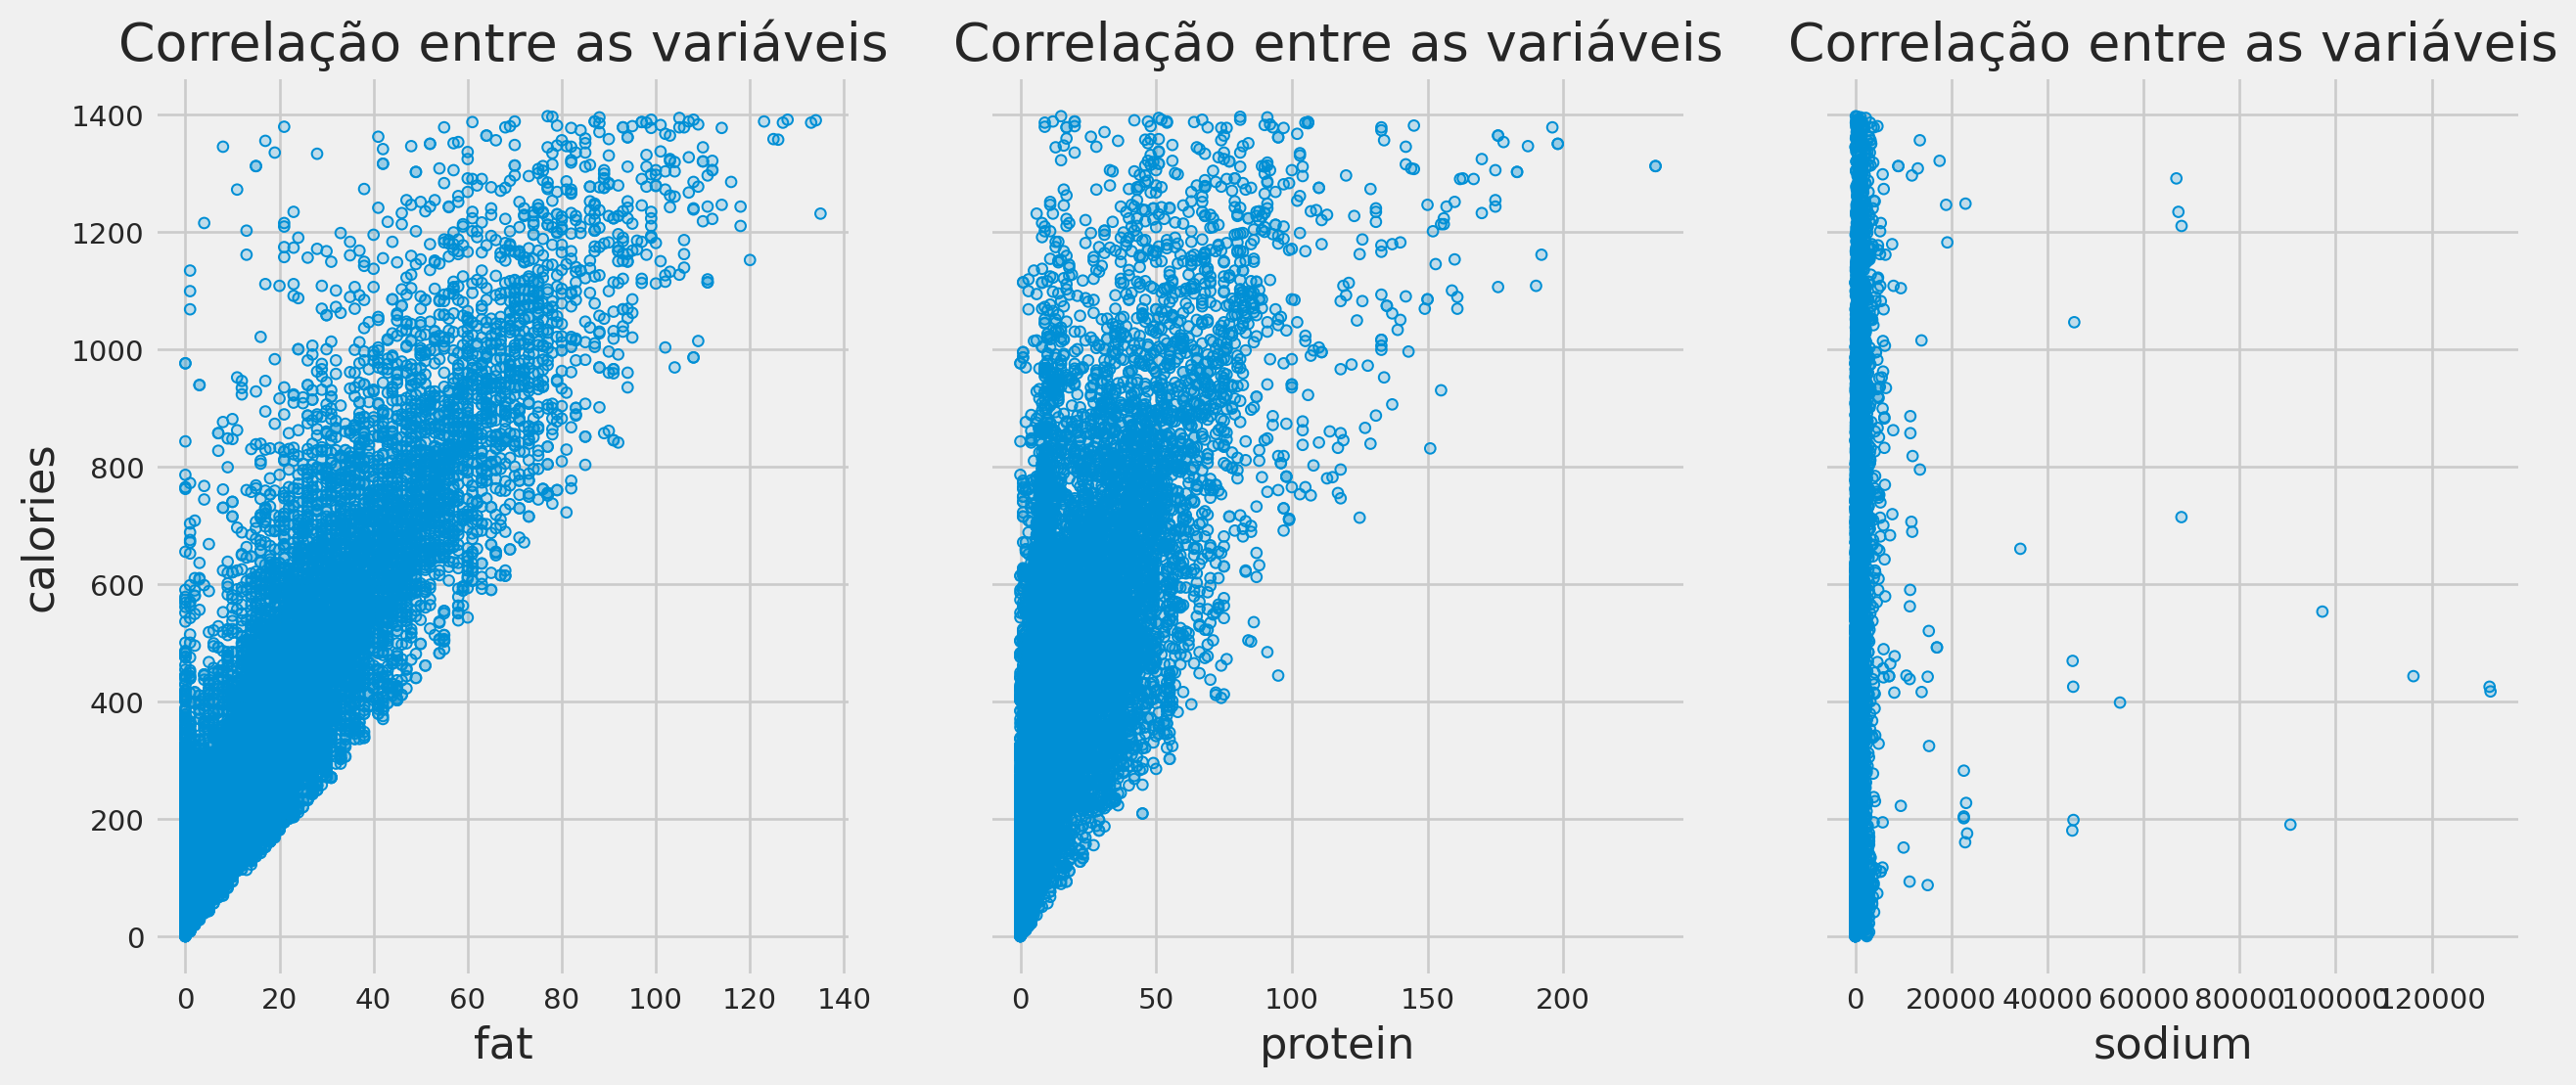

In [ ]:
fig = (
    so.Plot(receitas_2000, y="calories")
    .pair(x=["fat", "protein", "sodium"])
    .add(so.Dots())
    .layout(size=(14, 6))
    .label(title='Correlação entre as variáveis')
)
fig.theme({**style.library["fivethirtyeight"]})

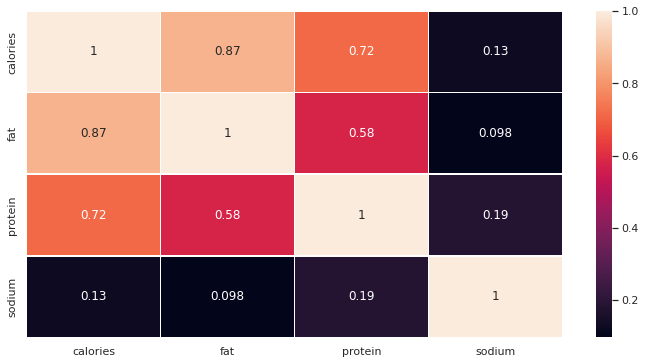

In [ ]:
# .corr calcula a correlação entre as variáveis.
df_corr = receitas_2000[['calories', 'fat', 'protein', 'sodium']].corr()

# Retorna um gráfico de calor calor de acordo com os valores da variável 'df_corr'
sns.heatmap(df_corr, annot=True, linewidth=.5)
sns.set(rc={"figure.figsize":(12, 6)})

- Observa-se a forte correlação entre a variável calorias vs fat(gordura) com 0.87 de correlação, calorias vs proteína com 0.72 de correlação, já o sódio não apresentou correlação com calorias apenas 0.13. Isso significa que gordura e proteína tem culpa no aumento das calorias.

#Receitas com piores avaliações.

In [ ]:
# Retorna apenas as receitas que tem avaliação maior do que zero e menor do que 3.
piores = receitas.query('rating > 0 and rating < 3')

In [ ]:
piores.head()

,directions,fat,date,categories,calories,desc,protein,rating,title,ingredients,sodium
0,"[1. Place the stock, lentils, celery, carrot, ...",7.0,2006-09-01 04:00:00+00:00,"[Sandwich, Bean, Fruit, Tomato, turkey, Vegeta...",426.0,None,30.0,2.500,"Lentil, Apple, and Turkey Wrap","[4 cups low-sodium vegetable or chicken stock,...",559.0
16,[Butter and sugar six 2/3-to 3/4-cup ramekins....,5.0,2008-12-04 04:00:00+00:00,"[Bread, Milk/Cream, Breakfast, Brunch, Dessert...",146.0,Classic spoon bread is a savory pudding served...,4.0,1.875,Sweet Buttermilk Spoon Breads,"[1 cup water, 2/3 cup buttermilk, 1/3 cup heav...",160.0
27,[Preheat oven to 275°F. Mix sugar and spices i...,0.0,2007-07-26 17:36:37+00:00,"[Bake, Kid-Friendly, Pear, Spice, Healthy, Bon...",14.0,"Use a V-slicer (a simple, inexpensive version ...",0.0,2.500,Dried Pear Crisps,"[1 tablespoon sugar, 1/4 teaspoon ground ginge...",0.0
39,"[Whisk together flour (2 cups), sugar, salt, a...",6.0,2006-07-24 18:27:47+00:00,"[Bread, Side, Vegetarian, Grill, Grill/Barbecu...",145.0,Cooking these flatbreads in a grill pan gives ...,3.0,2.500,Better-Than-Pita Grill Bread,[2 cups all-purpose flour plus additional for ...,208.0
119,[Pour first three ingredients over ice cubes i...,0.0,2006-10-11 14:24:45+00:00,"[Bitters, Bourbon, Liqueur, Alcoholic, Cocktai...",107.0,None,0.0,2.500,Laddie's Sub-Bourbon,"[1 1/2 ounces bourbon, 1 dash orange curaçao, ...",0.0


/usr/lib/python3.8/_collections_abc.py:832: MatplotlibDeprecationWarning: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  self[key] = other[key]
/usr/lib/python3.8/_collections_abc.py:832: MatplotlibDeprecationWarning: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  self[key] = other[key]


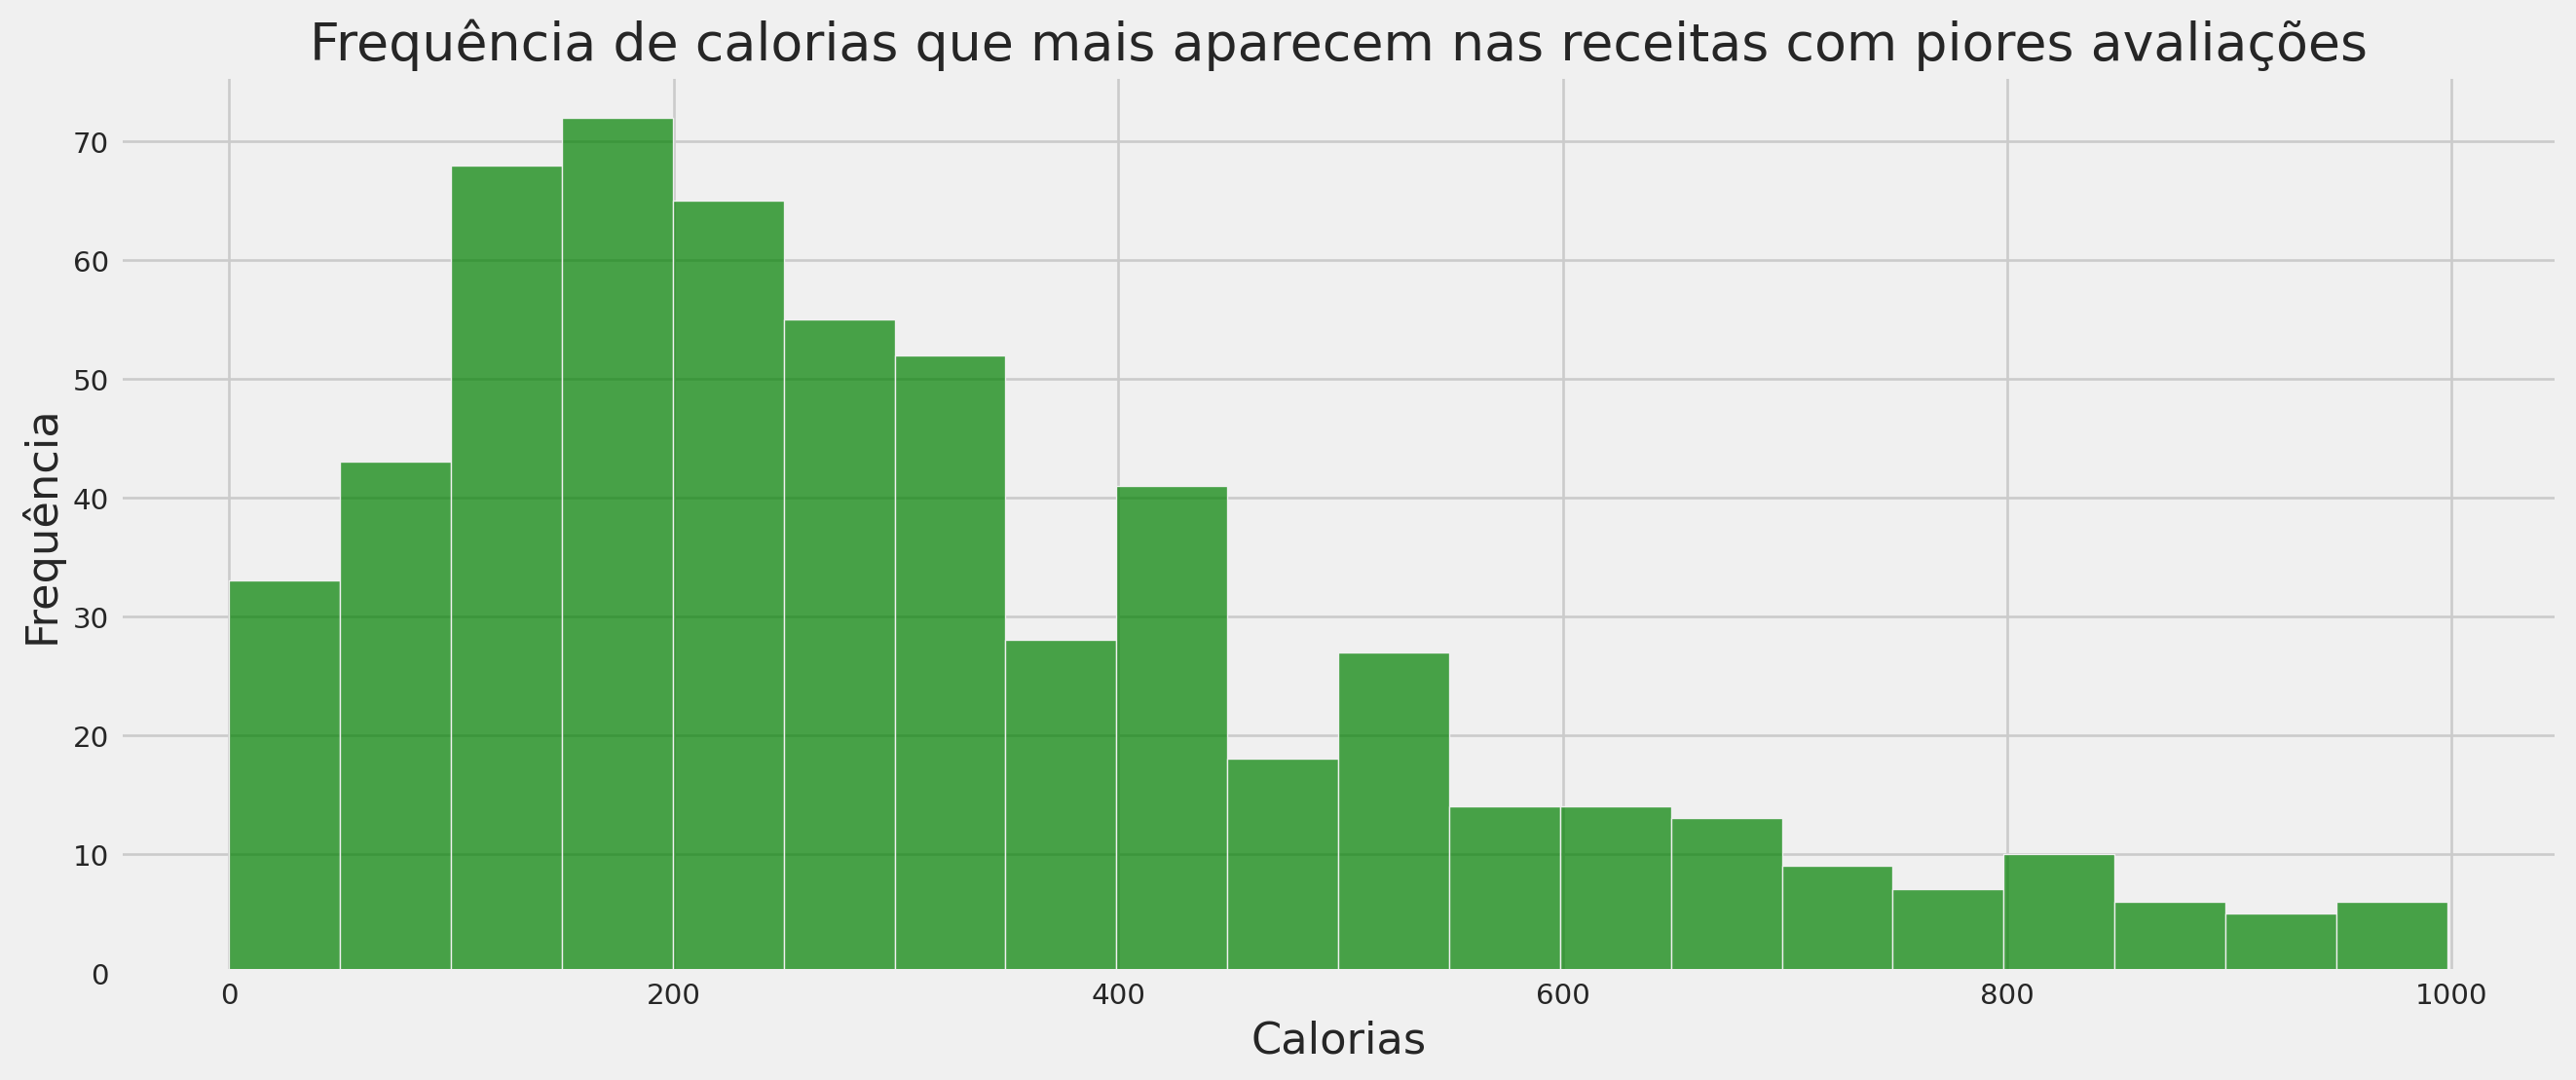

In [ ]:
# Gera um gráfico de barras com os dados observados.
fig = (
    so.Plot(piores.query('calories <= 1000'), x="calories")
    .add(so.Bars(color='green'), so.Hist(bins=20))
    .label(x="Calorias", y="Frequência", title='Frequência de calorias que mais aparecem nas receitas com piores avaliações')
    .layout(size=(14, 6))
)
fig.theme({**style.library["fivethirtyeight"]})

- As receitas com piores avaliações tem como maiores frequências os valores calóricos entre 150 e 200.

In [ ]:
size = len(piores)
size

824

In [ ]:
# Transforma cada lista da variável 'categories' em uma única lista.
categoria_p = pd.DataFrame(sum(piores['categories'].tolist(), []))
# Conta quantas vezes se repete cada categoria.
categoria_p = pd.DataFrame(categoria_p.value_counts()).rename(columns={0:'count'}).reset_index()

In [ ]:
# Retorna apenas as 10 primeiras categorias
categoria_p = categoria_p.loc[:10]

In [ ]:
categoria_p

,0,count
0,Vegetarian,343
1,Peanut Free,339
2,Soy Free,325
3,Gourmet,301
4,Tree Nut Free,284
5,Bon Appétit,283
6,Kosher,272
7,Pescatarian,268
8,Wheat/Gluten-Free,220
9,Quick & Easy,206


In [ ]:
# Lista contendo a porcentagem de vezes em que a categoria aparece nas receitas com piores avaliações.
categoria_p['percentil'] = [round(c, 2) for c in categoria_p['count'] / size * 100 ]

In [ ]:
categoria_p

,0,count,percentil
0,Vegetarian,343,41.63
1,Peanut Free,339,41.14
2,Soy Free,325,39.44
3,Gourmet,301,36.53
4,Tree Nut Free,284,34.47
5,Bon Appétit,283,34.34
6,Kosher,272,33.01
7,Pescatarian,268,32.52
8,Wheat/Gluten-Free,220,26.70
9,Quick & Easy,206,25.00


/usr/lib/python3.8/_collections_abc.py:832: MatplotlibDeprecationWarning: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  self[key] = other[key]
/usr/lib/python3.8/_collections_abc.py:832: MatplotlibDeprecationWarning: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  self[key] = other[key]


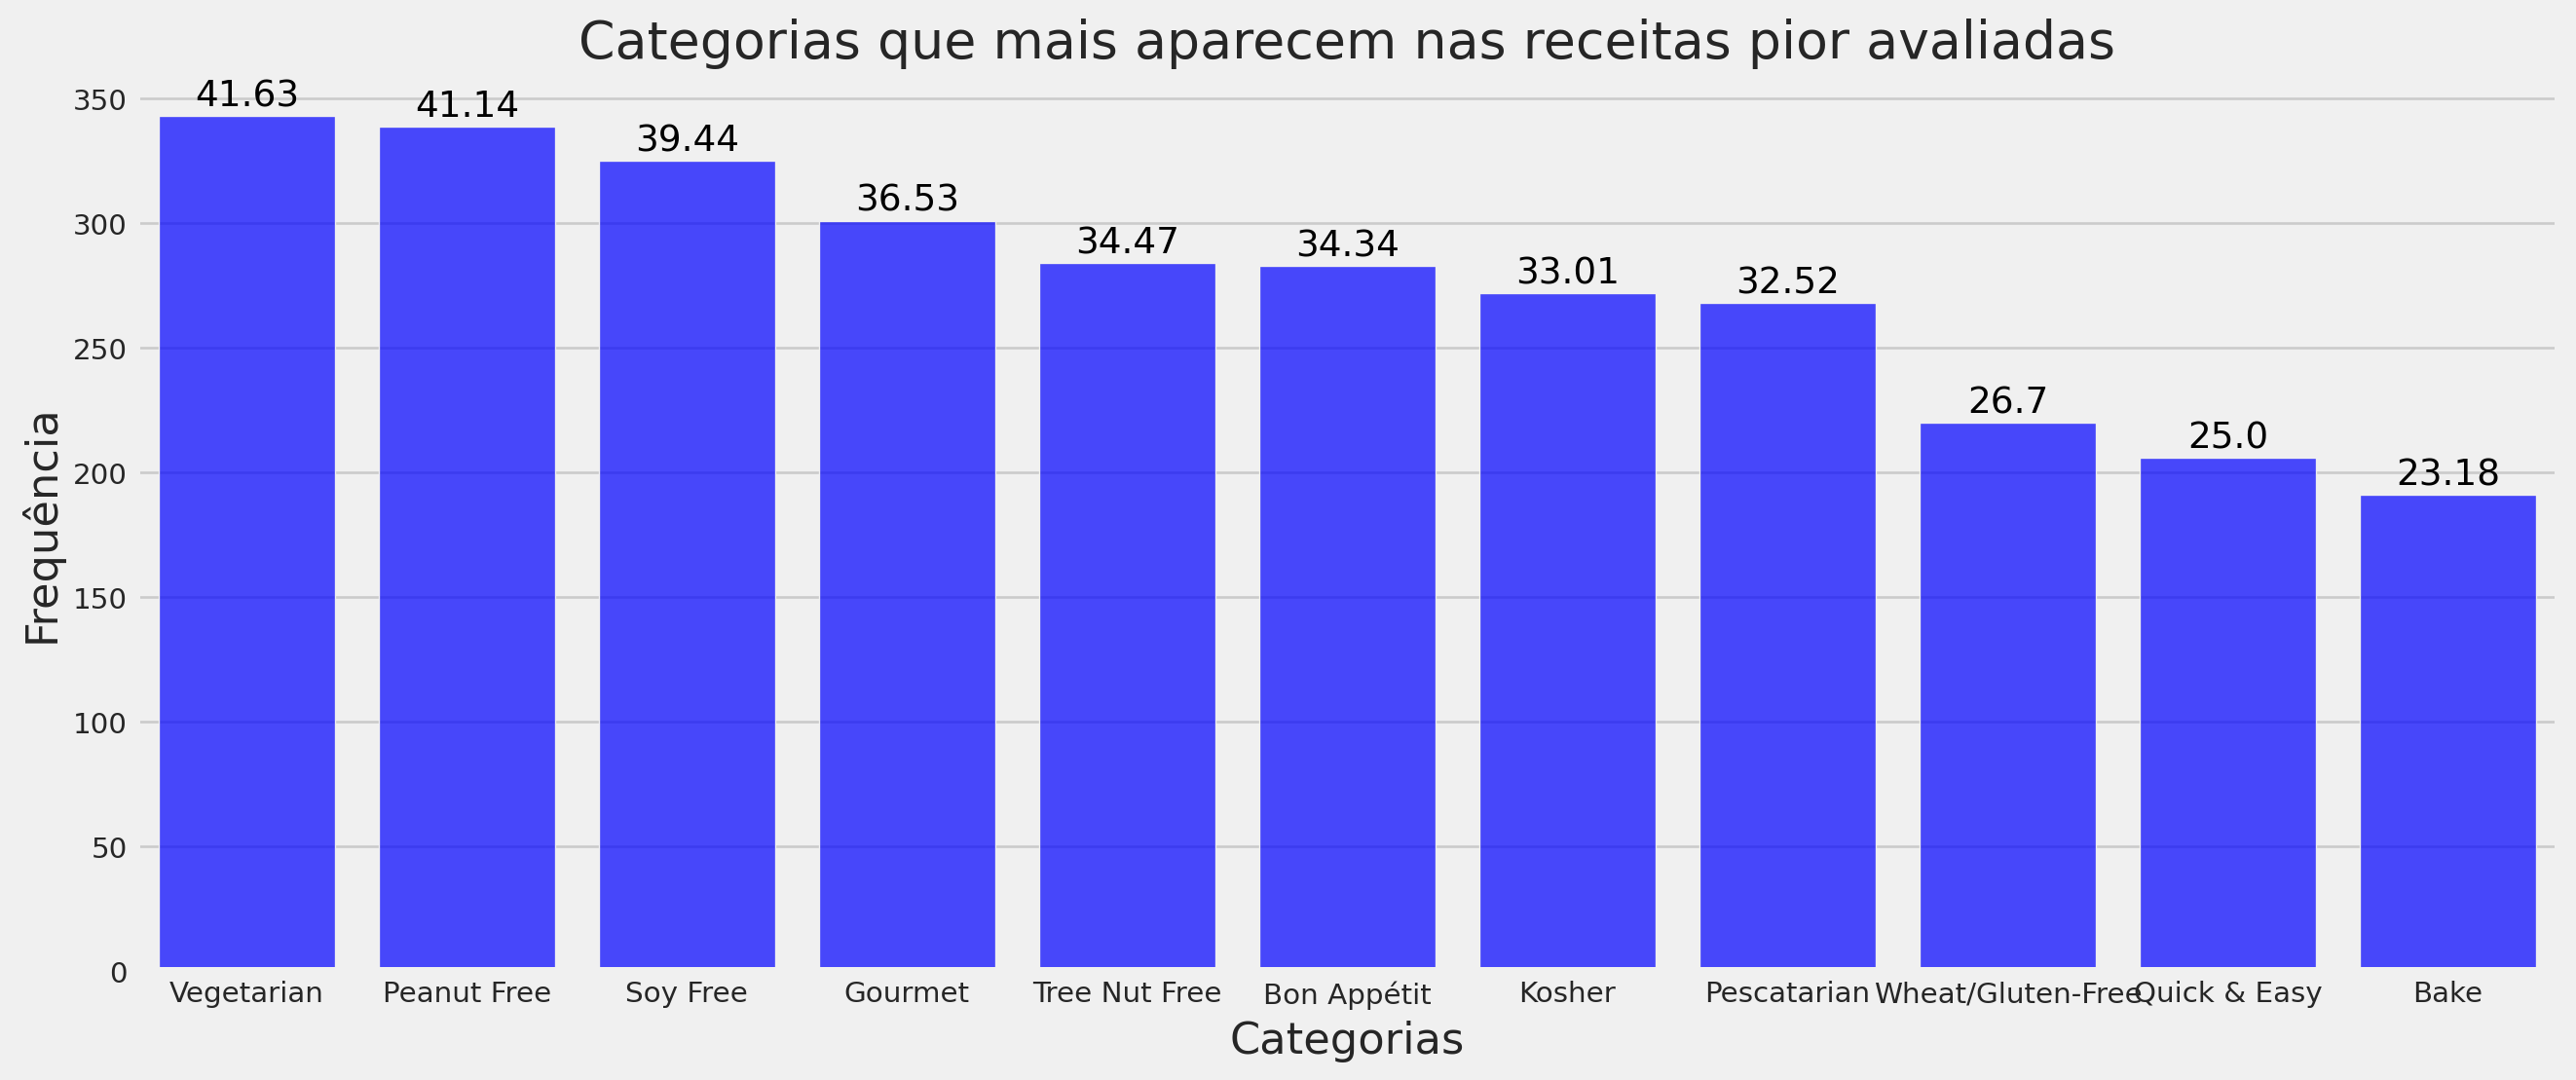

In [ ]:
# Gera um gráfico de barras com os dados observados.
fig = (
    so.Plot(categoria_p, x=0, y="count", text = 'percentil')
    .add(so.Bars(width=0.8, color='blue'))
    .label(x="Categorias", y="Frequência", title='Categorias que mais aparecem nas receitas pior avaliadas')
    .layout(size=(14, 6))
    .add(so.Text(valign='baseline', color="black"))
)
fig.theme({**style.library["fivethirtyeight"]})

- Receitas vegetarianas, sem amendoim e sem soja estão presentes em aproximadamente 42% das receitas com avaliações baixa.

- O que leva essas receitas terem um rating de avaliação ruim?
 - Uma possibilidade pode ser a quantidade de avaliação na receita em sí, pode ser que a receita tenha menos de uma dezena de votos, o que faz com que qualquer voto faça diferença na média, outra é que normalmente a pessoa vê o grau de aceitação não a quantidade de aceitação e isso sim faz diferença na hora de escolher uma receita.

 - Vegano? comida vegana é ruim? a comida vegana contemporânea pode trazer uma série de experimentos, não significa que seja ruim, como é uma onda nova de estilo de vida que que teve o seu grau de reconhecimento podemos dizer que os próprios veganos ainda estão separando o que pode ser uma boa receita para esse estilo ou não, e a avaliação ajuda outras pessoas na escolha.
 - Talvez a dificuldade de preparação ou a receira inconclusa esteja afetando esse rating.

In [ ]:
# Transforma cada lista da variável 'ingredients' em uma única lista.
ingredientes_p = pd.DataFrame(sum(piores['ingredients'].tolist(), []))

In [ ]:
ingredientes_p[0]

0       4 cups low-sodium vegetable or chicken stock
1                          1 cup dried brown lentils
2                 1/2 cup dried French green lentils
3                           2 stalks celery, chopped
4                 1 large carrot, peeled and chopped
                            ...                     
7116                 3 cups pitted dates (14 ounces)
7117                  1 (750-ml) bottle dry red wine
7118                 1 (3- to 4-inch) cinnamon stick
7119                              2 whole star anise
7120              Special equipment: parchment paper
Name: 0, Length: 7121, dtype: object

In [ ]:
# Transforma a lista em uma string, já que o word cloud funciona com string não lista.
text = " ".join(ingredientes_p[0])

In [ ]:
# Definindo as stopwords padrões da lingua inglesa.

stops = set(stopwords.words('english'))
print(stops)

{'s', 'this', "isn't", 'they', 'to', "shan't", 'is', 'it', 'only', "wasn't", "mustn't", 't', 'isn', 'wasn', 'our', 'those', 'wouldn', 'will', 'again', 'very', 'because', 'when', 'from', 'in', "couldn't", 'how', 'hers', 'had', 'ours', 'now', 'whom', 'ma', 'was', 'has', 'm', 'yours', 'you', 'the', 'haven', 'mustn', "wouldn't", 'y', 'itself', 'against', 'at', 'during', 'me', 'just', 'himself', 'or', 'its', 'are', 'have', 'needn', 'through', 'on', 'so', 'i', 'under', 'did', 'between', "you've", "mightn't", 'hasn', 'her', "that'll", 'up', "needn't", 'then', 'more', "weren't", 'couldn', 'doesn', 'themselves', 'been', 'own', "hadn't", 'mightn', "won't", 'won', 'where', 'be', 'until', 'your', 'an', 'my', "should've", "you'd", 'don', 'off', 'few', 'their', 'any', 'not', 'most', 'ain', "you'll", 'shan', 'by', 'over', 'before', 'once', 'him', 'further', 'about', 'does', 'why', 'some', "haven't", 'were', 'yourself', "it's", 'too', 'as', 'nor', 'after', "you're", 'myself', 'down', 'and', 'his', 'ca

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# Stop words custom.
stopwords = {'1', '2', '1/4', '1/2', '3/4', '2/3', '1/3', '6', '12', 'cup', 'cups', 'teaspoon', 'teaspoons', 'tablespoon', 'tablespoons', 'cut',
             'large','medium','small','plus','sliced', 'finely', 'pound', 'pounds', 'ounce', 'ounces', 'sliced', 'decide', 'chopped', 'inch', 'quart',
             'peeled'}
# Faz a união dos dos sets de stop words.
stopwords = stopwords.union(stops)

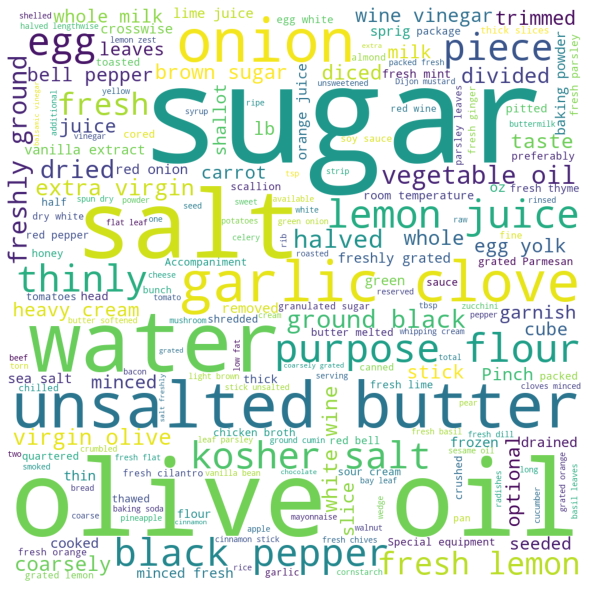

In [ ]:
# Retorna uma imagem com os ingredientes mais utilizados, quanto maior a palavra ela esta presente nas receitas.

# Cria a núvem de palavras.
wordcloud = WordCloud(width = 1000, height = 1000, 
                background_color ='white', 
                stopwords = set(stopwords), 
                min_font_size = 10).generate(text)

# Monta a imagem para exibição.
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

# Receitas com melhores avaliações.

In [ ]:
# Retorna apenas as receitas que tem avaliação maior do que zero e menor do que 3.
melhores = receitas.query('rating > 4 and rating <= 5')

In [ ]:
melhores

,directions,fat,date,categories,calories,desc,protein,rating,title,ingredients,sodium
1,[Combine first 9 ingredients in heavy medium s...,23.0,2004-08-20 04:00:00+00:00,"[Food Processor, Onion, Pork, Bake, Bastille D...",403.0,This uses the same ingredients found in boudin...,18.0,4.375,Boudin Blanc Terrine with Red Onion Confit,"[1 1/2 cups whipping cream, 2 medium onions, c...",1439.0
3,[Heat oil in heavy large skillet over medium-h...,NaN,2009-03-27 04:00:00+00:00,"[Fish, Olive, Tomato, Sauté, Low Fat, Low Cal,...",NaN,The Sicilian-style tomato sauce has tons of Me...,NaN,5.000,Mahi-Mahi in Tomato Olive Sauce,"[2 tablespoons extra-virgin olive oil, 1 cup c...",NaN
5,"[Mix basil, mayonnaise and butter in processor...",79.0,2004-08-20 04:00:00+00:00,"[Sandwich, Food Processor, Tomato, Kid-Friendl...",948.0,This recipe can be prepared in 45 minutes or l...,19.0,4.375,The Best Blts,[2 1/2 cups (lightly packed) fresh basil leave...,1042.0
6,[Cook potatoes and carrots in large pot of boi...,NaN,2004-08-20 04:00:00+00:00,"[Salad, Potato, Side, Easter, Low Fat, Quick &...",NaN,Serve this newfangled main-course salad with a...,NaN,4.375,Ham and Spring Vegetable Salad with Shallot Vi...,"[1 1/2 pounds small red-skinned potatoes, each...",NaN
8,"[Stir together soy sauce, sugar, sesame oil, w...",10.0,2004-08-20 04:00:00+00:00,"[Beef, Ginger, Sauté, Stir-Fry, Quick & Easy, ...",170.0,Bulgogi,7.0,4.375,Korean Marinated Beef,"[1/4 cup soy sauce, 1 tablespoon sugar, 2 teas...",1272.0
...,...,...,...,...,...,...,...,...,...,...,...
20121,[1. Preheat the oven to 400°F. Spray a baking ...,70.0,2014-03-21 04:00:00+00:00,"[Chicken, Poultry, Bake, Passover, Fennel, Sha...",1086.0,Kosher Status: Poultry,78.0,5.000,Crispy Salt and Pepper Chicken with Caramelize...,"[Cooking spray, One 3 1/2-pound chicken, cut i...",1323.0
20126,[Bring broth to simmer in saucepan.Remove from...,28.0,2008-02-28 22:06:54+00:00,"[Side, Kid-Friendly, High Fiber, Dinner, Parme...",671.0,Cooking the artichokes with the rice infuses t...,22.0,4.375,Artichoke and Parmesan Risotto,"[5 1/2 cups (or more) low-salt chicken broth, ...",583.0
20127,"[Using a sharp knife, cut a shallow X in botto...",38.0,2005-10-21 18:21:20+00:00,"[Onion, Poultry, turkey, Vegetable, Bake, Kid-...",563.0,None,31.0,4.375,Turkey Cream Puff Pie,"[1 small tomato, 1 small onion, finely chopped...",652.0
20128,[Heat 2 tablespoons oil in heavy medium skille...,24.0,2004-08-20 04:00:00+00:00,"[Milk/Cream, Citrus, Dairy, Fish, Garlic, Past...",631.0,"Sharon Hooykaas of Los Alamitos, California, w...",45.0,4.375,Snapper on Angel Hair with Citrus Cream,"[4 tablespoons olive oil, 4 shallots, thinly s...",517.0


/usr/lib/python3.8/_collections_abc.py:832: MatplotlibDeprecationWarning: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  self[key] = other[key]
/usr/lib/python3.8/_collections_abc.py:832: MatplotlibDeprecationWarning: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  self[key] = other[key]


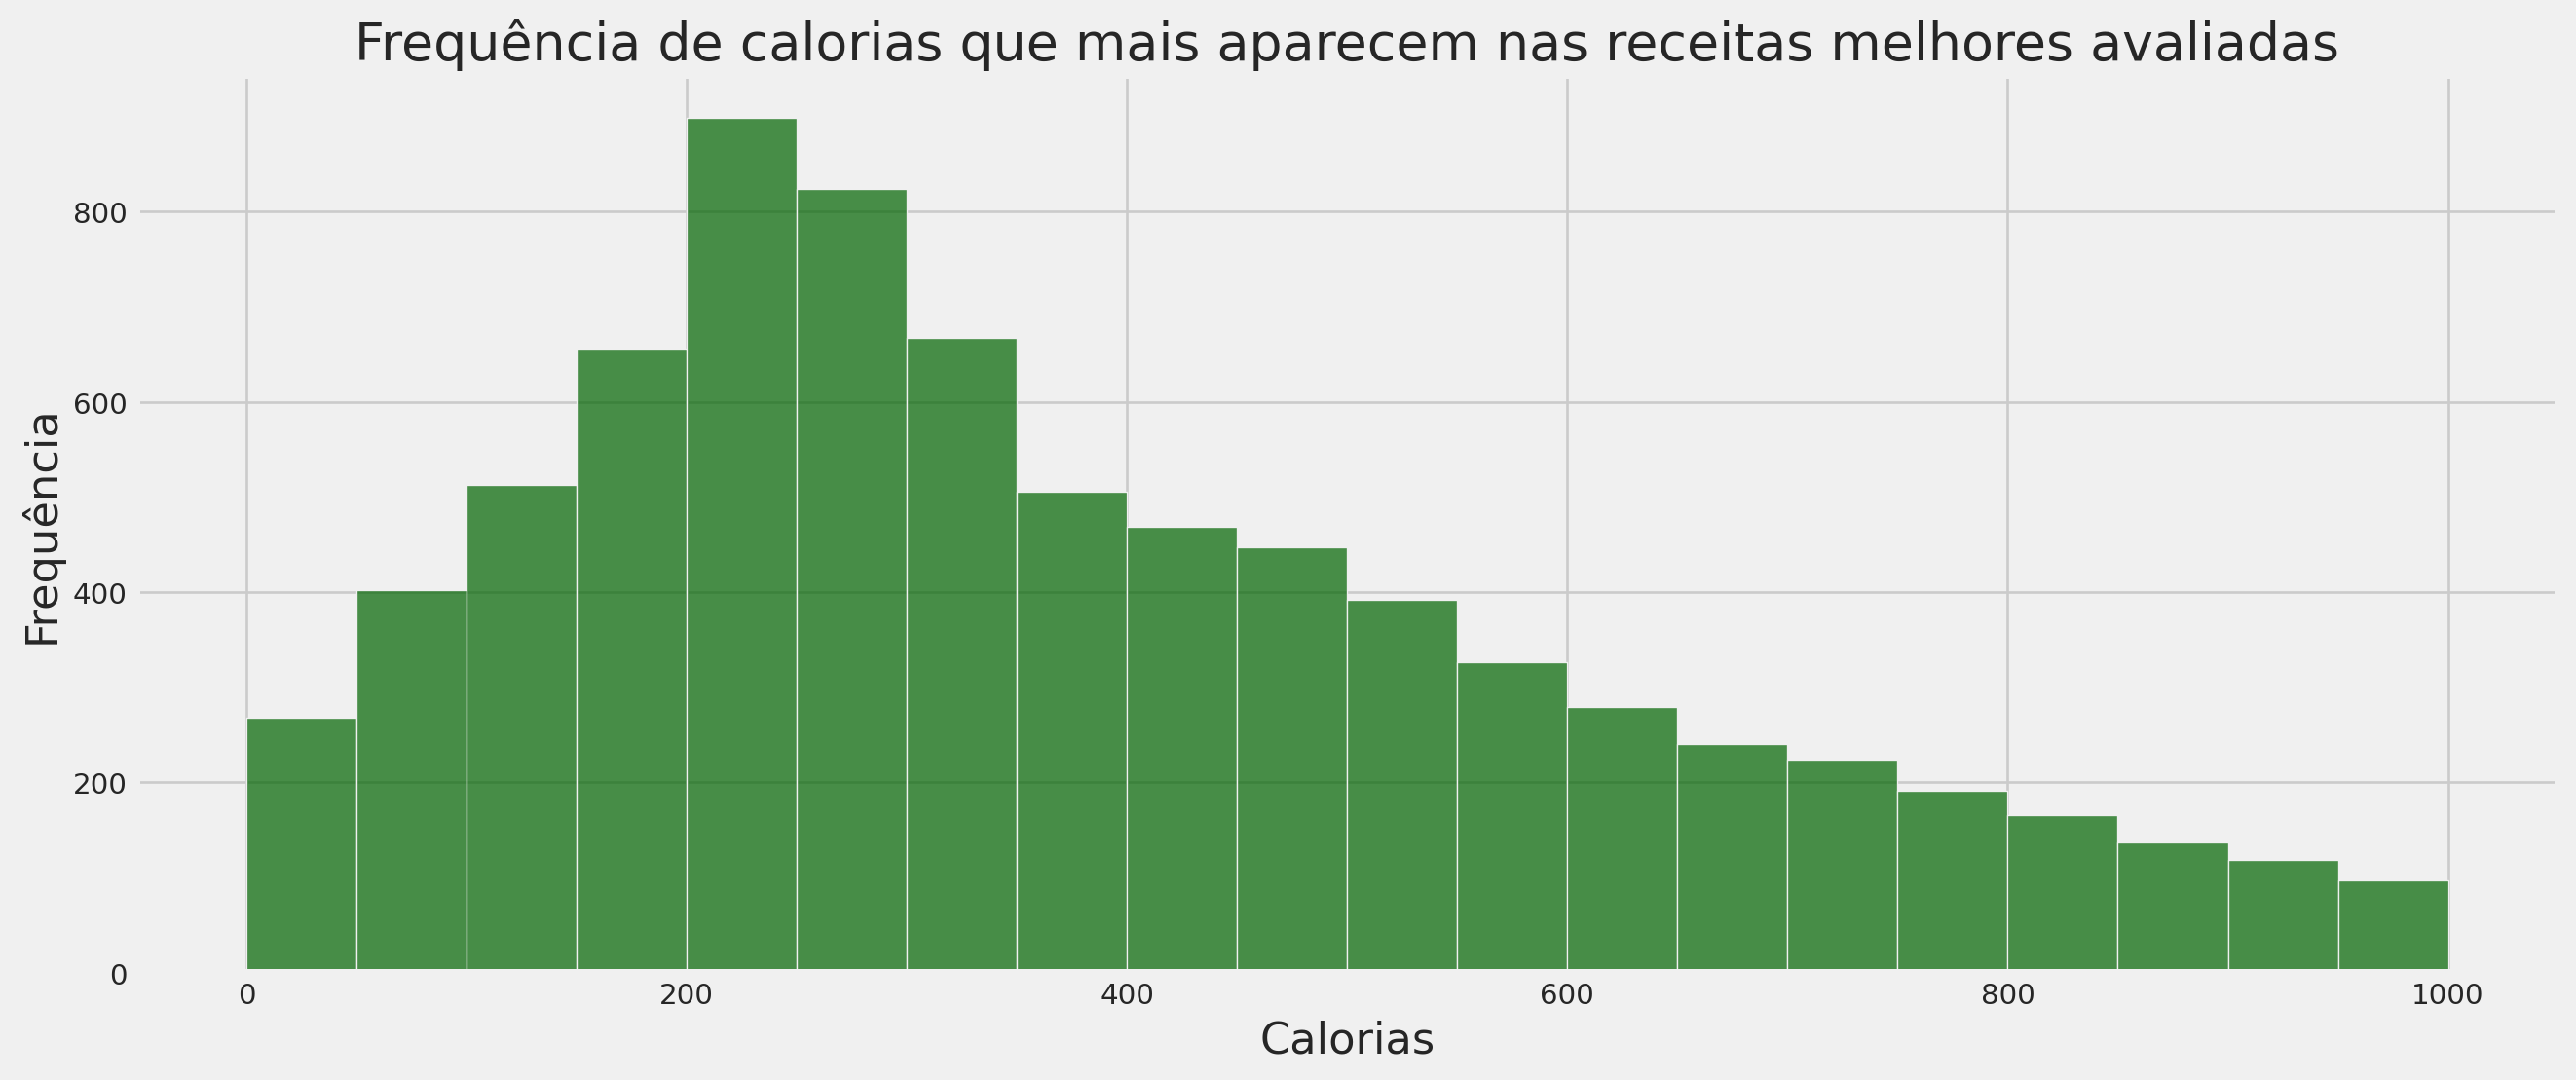

In [ ]:
# Gera um gráfico de barras com os dados observados.
fig = (
    so.Plot(melhores.query('calories <= 1000'), x="calories")
    .add(so.Bars(color='darkgreen'), so.Hist(bins=20))
    .label(x="Calorias", y="Frequência", title='Frequência de calorias que mais aparecem nas receitas melhores avaliadas')
    .layout(size=(14, 6))
)
fig.theme({**style.library["fivethirtyeight"]})

- Diferente da anterior, as receitas com melhores avaliações tem valores calóricos entre 200 e 300.

In [ ]:
size = len(melhores)
size

10764

In [ ]:
# Transforma cada lista da variável 'categories' em uma única lista.
categoria_m = pd.DataFrame(sum(melhores['categories'].tolist(), []))
# Conta quantas vezes se repete cada categoria.
categoria_m = pd.DataFrame(categoria_m.value_counts()).rename(columns={0:'count'}).reset_index()

In [ ]:
# Retorna apenas as 10 primeiras categorias.
categoria_m = categoria_m.loc[:10]
# Lista contendo a porcentagem de vezes em que a categoria aparece nas receitas com melhores avaliações.
categoria_m['percentil'] = [round(c, 2) for c in categoria_m['count'] / size * 100 ]

/usr/lib/python3.8/_collections_abc.py:832: MatplotlibDeprecationWarning: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  self[key] = other[key]
/usr/lib/python3.8/_collections_abc.py:832: MatplotlibDeprecationWarning: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  self[key] = other[key]


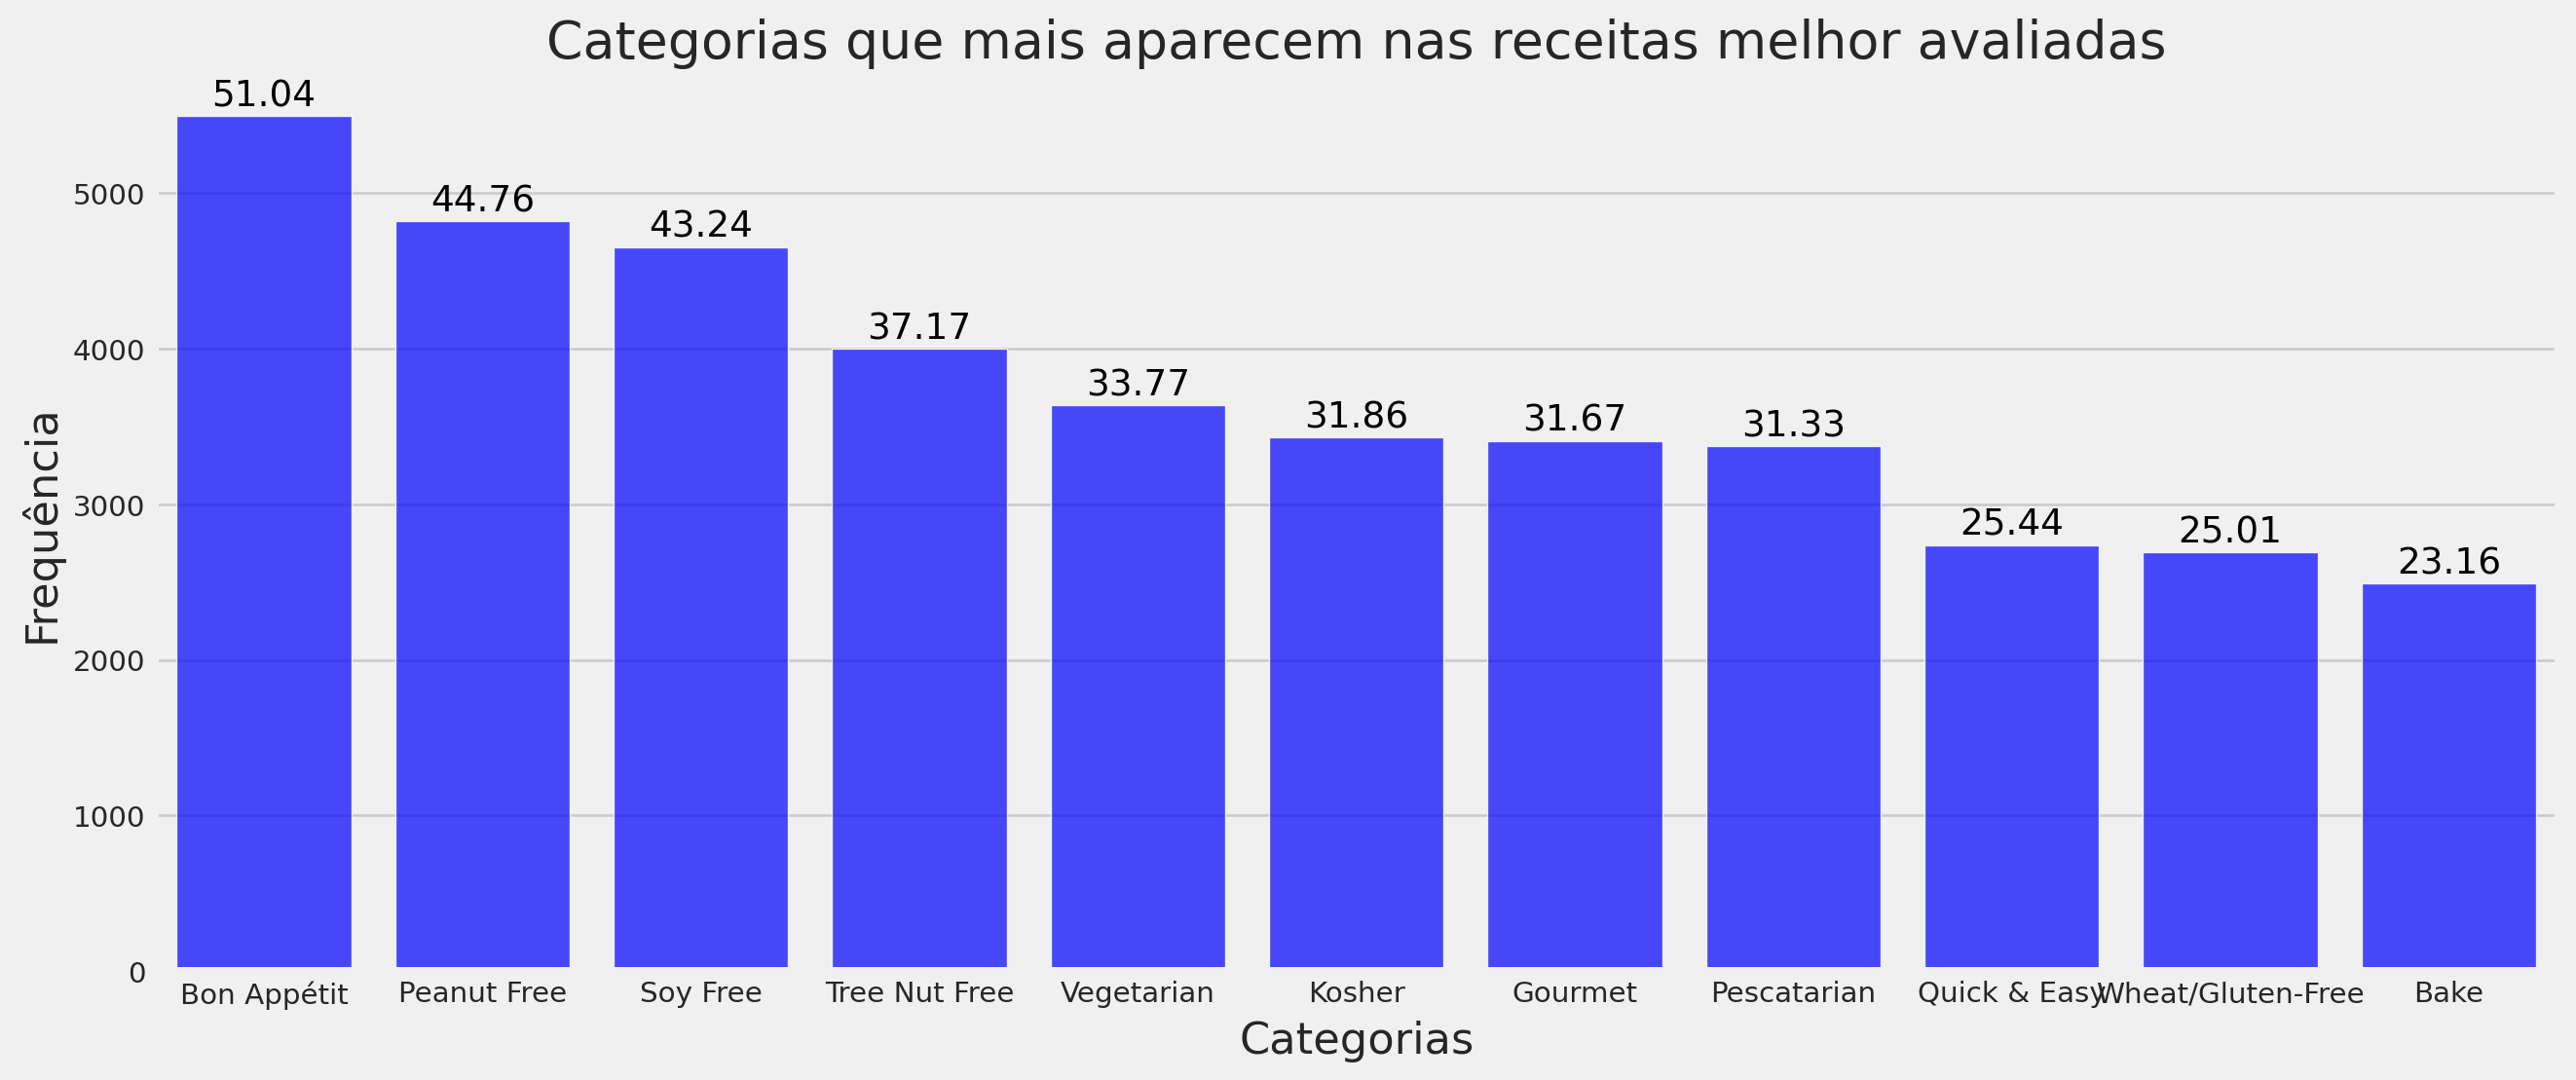

In [ ]:
# Gera um gráfico de barras com os dados observados.
fig = (
    so.Plot(categoria_m, x=0, y="count", text = 'percentil')
    .add(so.Bars(width=0.8, color='blue'))
    .label(x="Categorias", y="Frequência", title='Categorias que mais aparecem nas receitas melhor avaliadas')
    .layout(size=(14, 6))
    .add(so.Text(valign='baseline', color="black"))
)
fig.theme({**style.library["fivethirtyeight"]})

In [ ]:
# Transforma cada lista da variável 'ingredients' em uma única lista.
ingredientes_m = pd.DataFrame(sum(melhores['ingredients'].tolist(), []))

# Transforma a lista em uma string, já que o word cloud funciona com string não lista
text = " ".join(ingredientes_m[0])

''' MESMAS SOPWORDS UTILIZADAS ANTERIORMENTE'''

' MESMAS SOPWORDS UTILIZADAS ANTERIORMENTE'

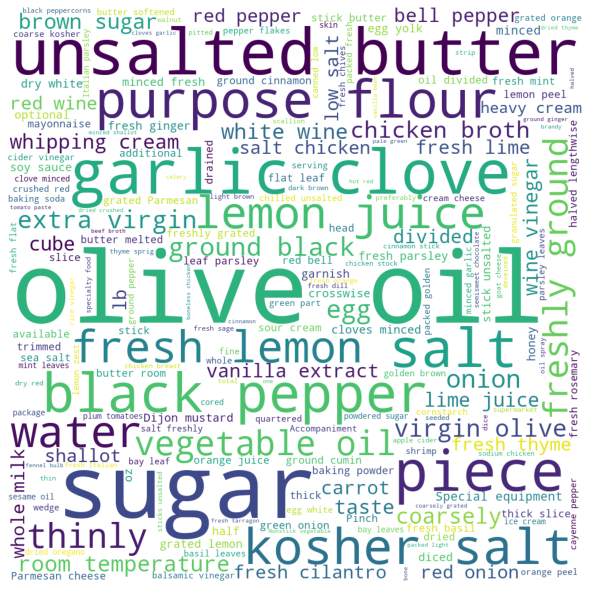

In [ ]:
# Retorna uma imagem com os ingredientes mais utilizados, quanto maior a palavra ela esta presente nas receitas

# Cria a núvem de palavras
wordcloud = WordCloud(width = 1000, height = 1000, 
                background_color ='white', 
                stopwords = set(stopwords), 
                min_font_size = 10).generate(text)

# Monta a imagem para exibição
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

# Clonclusão:
- Recebemos dados de receitas culinárias, aprendemos sobre um pouco sobre calorias, percebemos que existe uma corrrelação entre calorias e gordura/proteina.

- Analisamos as receitas com baixo rating de avaliações, descobrimos que essas receitas tem propensão a serem diet/vegana, concordamos com isso quando vimos o histograma que mostra a frequência de baixa caloria nas receitas, ingredientes comuns mais utilizados: Açucar, azeite de oliva, sal, água, manteiga sem sal, alho, cebola, limão.

- Analisamos as receitas com maior rating de avaliações, essas receitas não está tão distante das receitas com baixo rating, também tem propensão a serem livres de amendoim e soja, e 1/3 delas se diz vegetariana o restante acreditamos ser comidas normais Bon Appétit!, o histograma nos mostra que essas receitas tem mais calorias do que a análise de baixo rating, os ingredientes que mais aparecem nas receitas: Azeite de oliva, açucar, manteiga sem sal, alho, pimenta preta, limão, oleo vegetal.

- Sobre as ferramentas:
 - Utilizei o seaborn objects, um novo modo de montar gráficos com seaborn, tanto que no site oficial ainda tem a tag NEW, acredito que esse modo tem uma leitura melhor do código, e mantém os gráficos bonitos e ainda consigo adicionar facilmente os valores em cada barra por exemplo, gosto muito de usar o Plotly com gráficos interativos, porém ele é bastante pesado e não encontrei uma forma até hoje de manter os graficos à mostra quando reiniciado o kernel ou quando commitado para o GitHub, utilizei também pela primeira vez a núvel de palavras com NLTK, achei que seria mais complicado, ainda é possível eliminar mais palavras no stopwords para pegar aqueles ingredientes que tem certa diferença entre as análises.